In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import warnings
import math
from colorama import Style, Fore
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import os
from textblob import TextBlob

class Analysis:

    def __init__(self, name):
        self.name = name
        
        rc = {
            "axes.facecolor": "#E6FFE6",
            "figure.facecolor": "#E6FFE6",
            "axes.edgecolor": "#000000",
            "grid.color": "#EBEBE7",
            "font.family": "serif",
            "axes.labelcolor": "#000000",
            "xtick.color": "#000000",
            "ytick.color": "#000000",
            "grid.alpha": 0.4
        }
        sns.set(rc=rc)

        self.red = Style.BRIGHT + Fore.RED
        self.blu = Style.BRIGHT + Fore.BLUE
        self.mgt = Style.BRIGHT + Fore.MAGENTA
        self.gld = Style.BRIGHT + Fore.YELLOW
        self.res = Style.RESET_ALL
        self.df = None

        warnings.filterwarnings("ignore")

        if not os.path.exists(os.path.dirname(f'export/{name}/')):
            os.makedirs(os.path.dirname(f'export/{name}/'))

        self.dir = f'./export/{name}'
        
    def setDataframe(self, df):
        self.df = df    

    def missingValuesAnalysis(self):
        self.df.info()
        fig, ax = plt.subplots(2,2,figsize=(12,7))
        axs = np.ravel(ax)
        msno.matrix(self.df,  fontsize=9, color=(0.25,0,0.5),ax=axs[0])
        msno.bar(self.df, fontsize=8, color=(0.25,0,0.5), ax=axs[1])
        msno.heatmap(self.df,fontsize=8,ax=axs[2])
        msno.dendrogram(self.df,fontsize=8,ax=axs[3], orientation='top')

        fig.suptitle('Missing Values Analysis', y=1.01, fontsize=15)

        # Save the plot
        plt.savefig(f'{self.dir}/missing_values_analysis.png')

        # Show the plot
        plt.show()

    def fillna(self, value = 0):
        self.df = self.df.fillna(value, inplace=True)

    def describe(self):
        print(self.df.describe())

    def plotDistributions(self, cols = []):
        for col in cols:
            if self.df[col].dtype == 'object':
                plt.figure(figsize=(8, 8))
                col_counts = self.df[col].value_counts()
                plt.pie(col_counts, labels=col_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
                plt.title(f'Distribution of {col}', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
                plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
                plt.savefig(f'{self.dir}/Distribution of {col}.png')
                plt.show()
            else:
                plt.figure(figsize=(12, 6))
                sns.histplot(self.df[col], kde=True, color='skyblue')
                plt.title(f'Distribution of {col}', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
                plt.xlabel(f'{col}', fontsize = 12, fontweight = 'bold', color = 'darkblue')
                plt.ylabel('Frequency', fontsize = 12, fontweight = 'bold', color = 'darkblue')
                plt.savefig(f'{self.dir}/Distribution of {col}.png')
                plt.show()
            
        # Pairplot of Numerical Variables
        sns.pairplot(self.df[list(self.df.select_dtypes(include=['number']))], diag_kind='kde')
        plt.suptitle('Pairplot of Numerical Variables', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
        plt.savefig(f'{self.dir}/Pairplot of Numerical Variables.png')
        plt.show()

    def plotSentimentAnalysis(self, cols = []):
        for col in cols:
            plt.figure(figsize=(12, 4))
            self.df[f'Sentiment_{col}'] = self.df[col].apply(lambda x: TextBlob(x).sentiment.polarity)

            sns.histplot(self.df[f'Sentiment_{col}'], kde=True, color='skyblue')
            plt.title(f'Distribution of Sentiment Scores {col}', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
            plt.xlabel('Sentiment Score', fontsize = 12, fontweight = 'bold', color = 'darkblue')
            plt.ylabel('Frequency', fontsize = 12, fontweight = 'bold', color = 'darkblue')
            plt.savefig(f'{self.dir}/Distribution of Sentiment Scores {col}.png')
            plt.show()

    def plotWordcloud(self, cols = []):
        for col in cols:
            self.df[col] = self.df[col].astype(str)
            wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(self.df[col]))
            plt.figure(figsize=(10, 6))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.title(f'Word Cloud of {col}', fontsize = 14, fontweight = 'bold', color = 'darkblue')
            plt.axis('off')
            plt.savefig(f'{self.dir}/Word Cloud of {col}.png')
            plt.show()

    def plotCorrelationMatrix(self):

        # Drop non-numeric columns
        df_numeric = self.df[list(self.df.select_dtypes(include=['number']))]

        # Calculate the correlation matrix
        correlation_matrix = df_numeric.corr()

        # Visualize the correlation matrix as a heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
        plt.title("Correlation Heatmap", fontsize = 14, fontweight = 'bold', color = 'darkblue')
        plt.savefig(f'{self.dir}/Correlation Heatmap.png')
        plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49338 entries, 0 to 49337
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         45370 non-null  object 
 1   Review        48507 non-null  object 
 2   Cons_rating   49124 non-null  float64
 3   Cloth_class   49322 non-null  object 
 4   Materials     5741 non-null   float64
 5   Construction  5743 non-null   float64
 6   Color         5742 non-null   float64
 7   Finishing     5737 non-null   float64
 8   Durability    5734 non-null   float64
dtypes: float64(6), object(3)
memory usage: 3.4+ MB


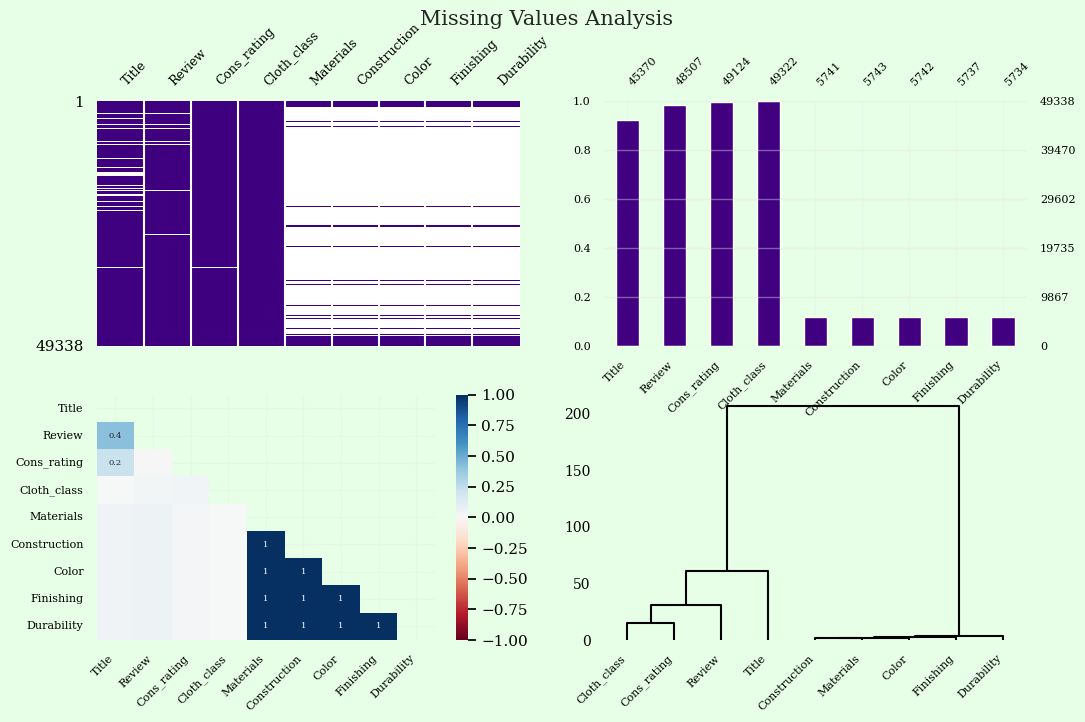

In [2]:
import pandas as pd

analysis = Analysis('dataset_amazon_customer_reviews')
df = pd.read_csv('./dataset/dataset_amazon_customer_reviews.csv')
analysis.setDataframe(df)
analysis.missingValuesAnalysis()


In [3]:
list(df.select_dtypes(include=['number']))

['Cons_rating',
 'Materials',
 'Construction',
 'Color',
 'Finishing',
 'Durability']

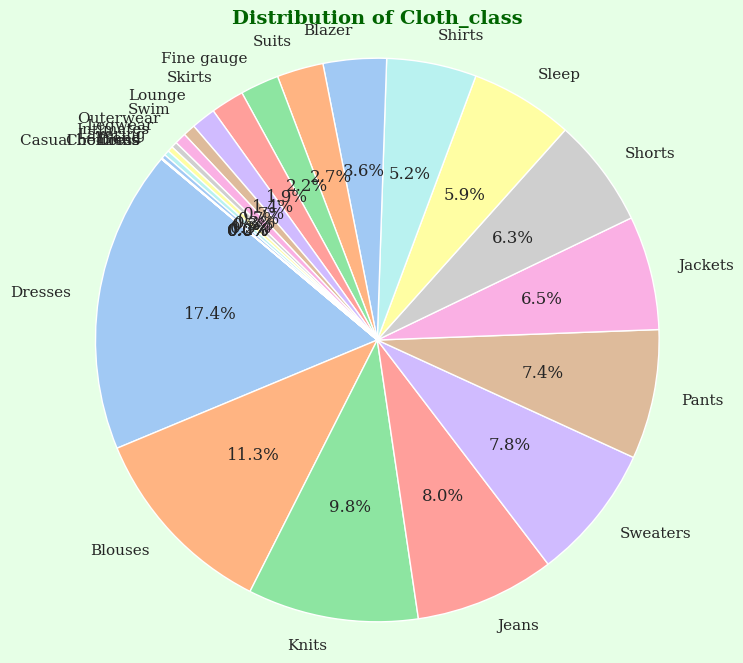

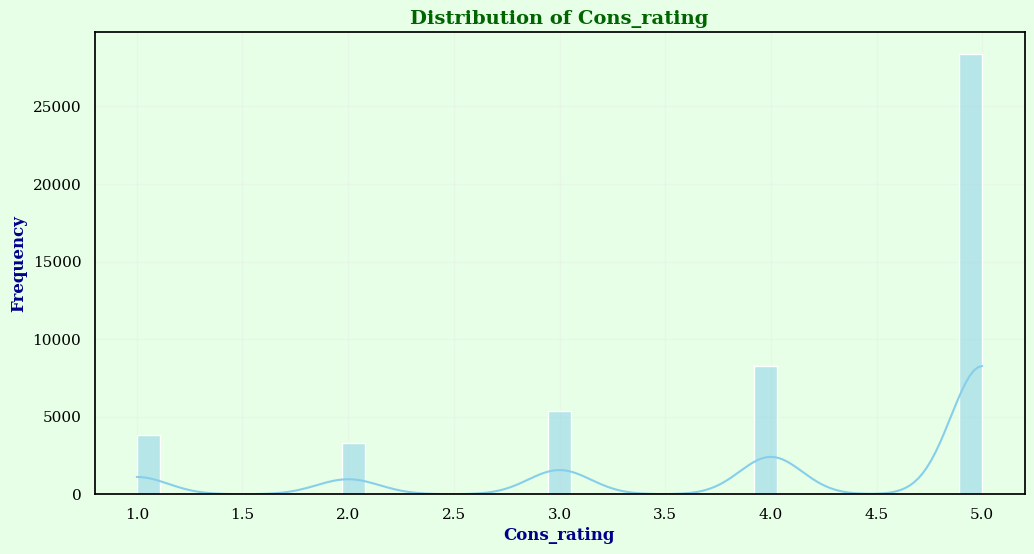

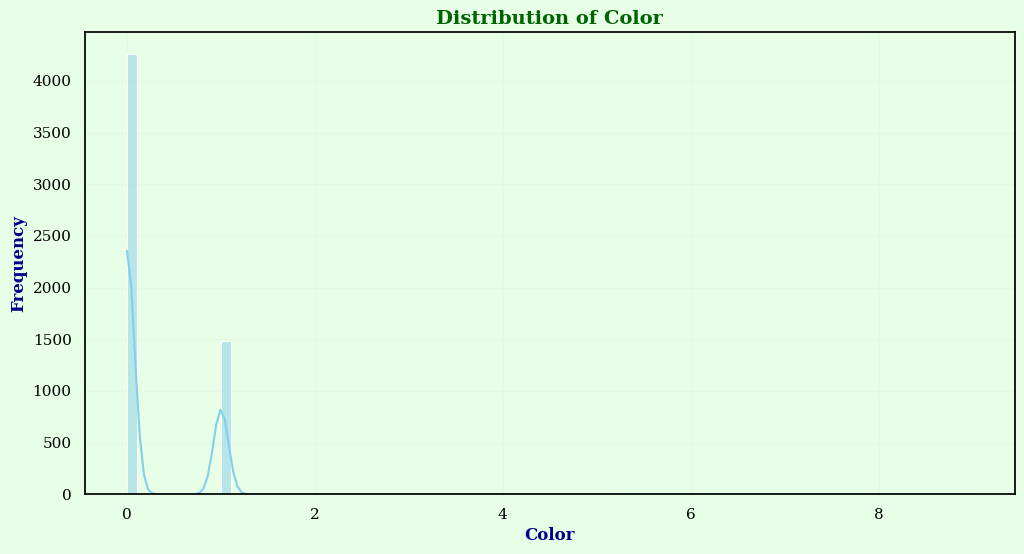

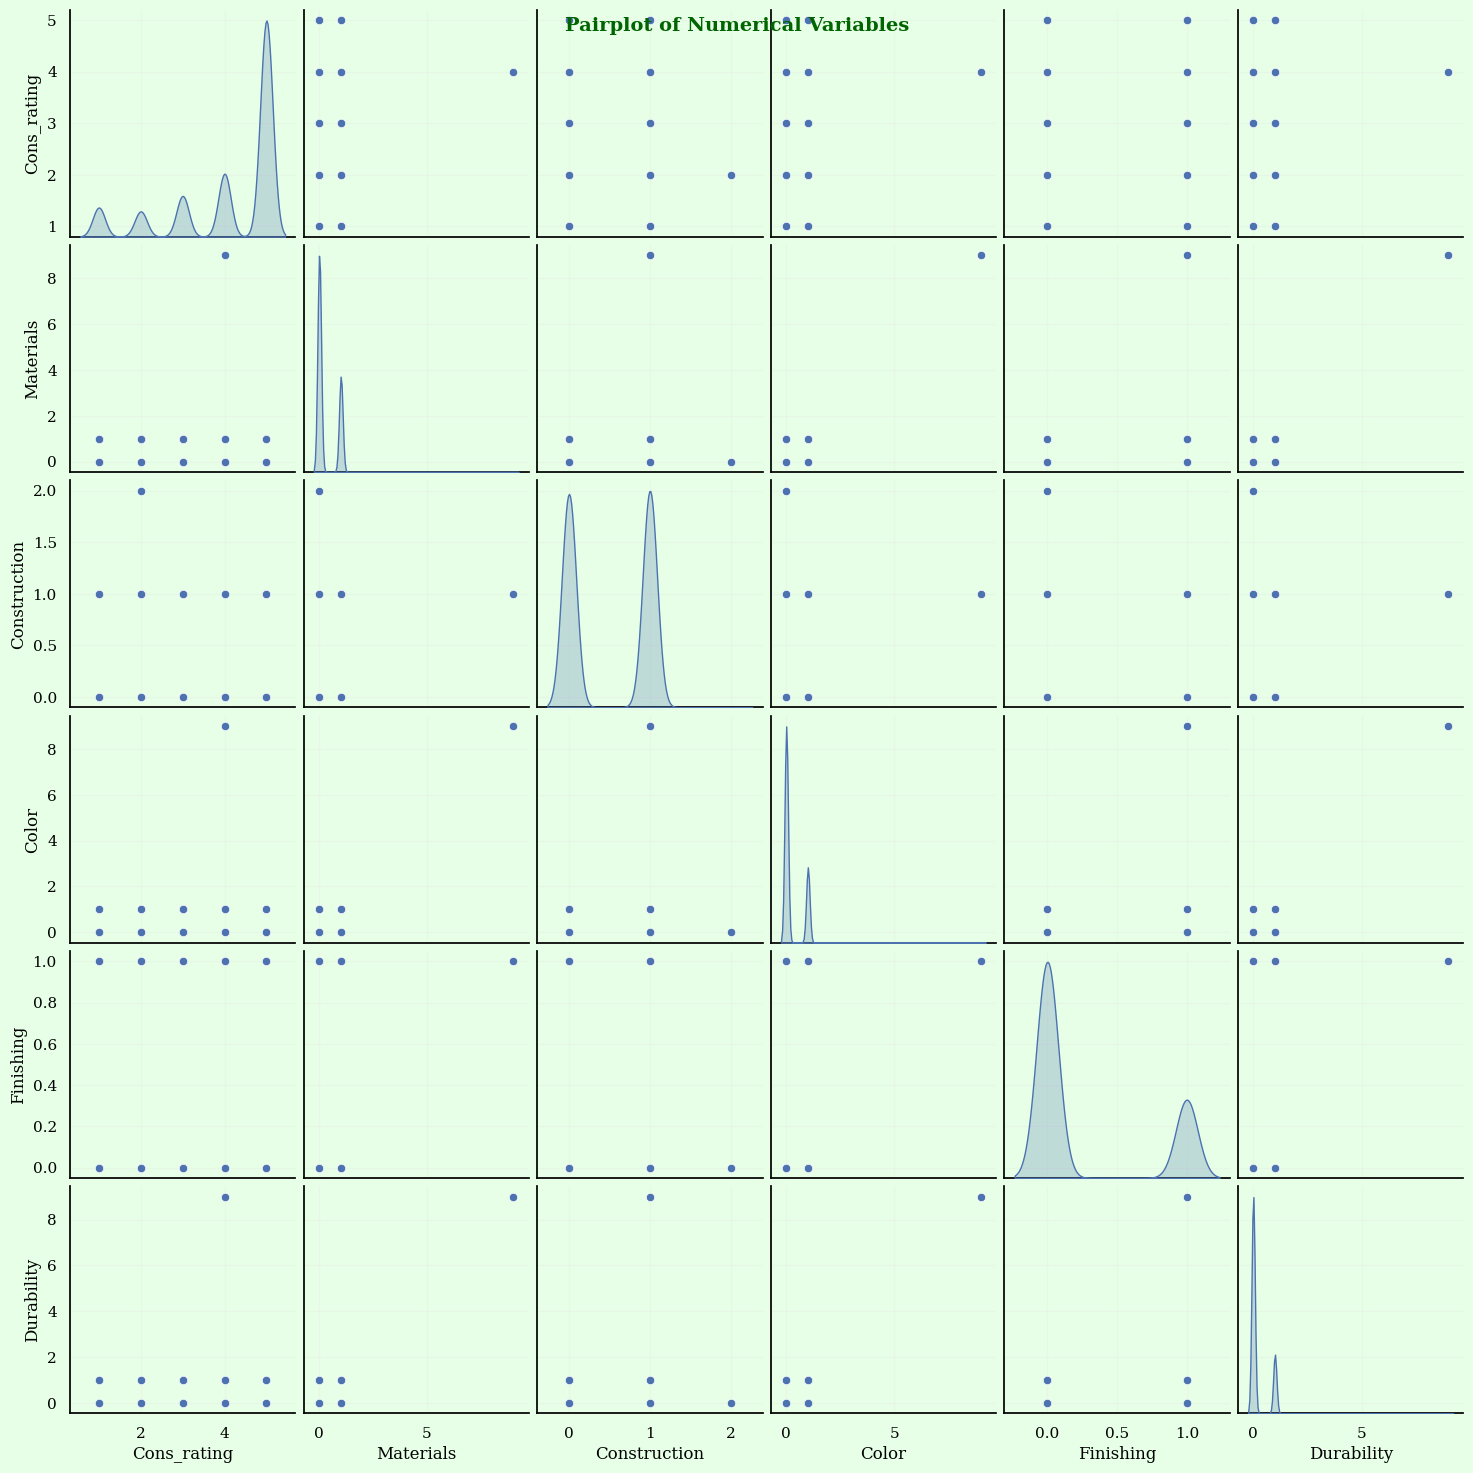

In [4]:
analysis.plotDistributions(['Cloth_class', 'Cons_rating', 'Color'])

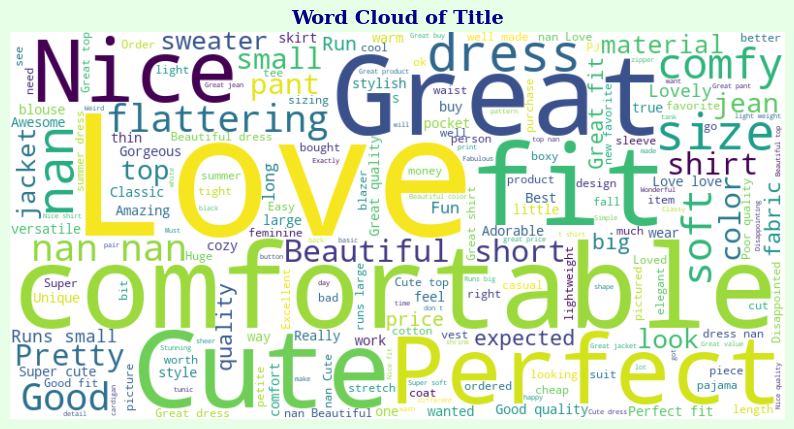

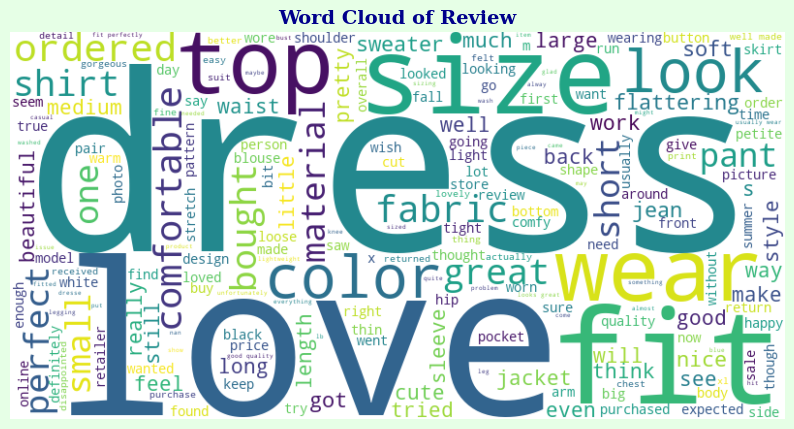

In [6]:
analysis.plotWordcloud(['Title','Review'])

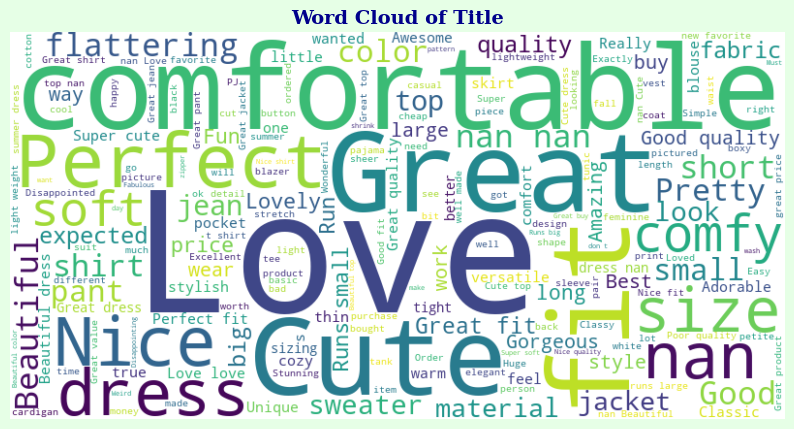

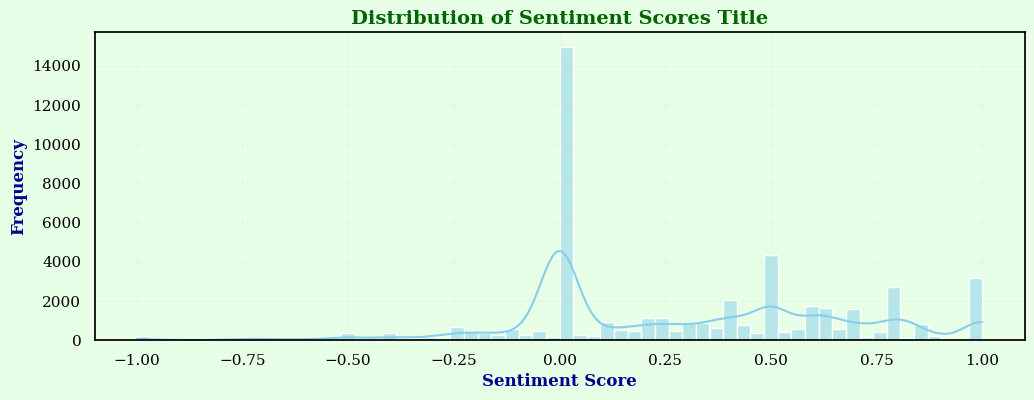

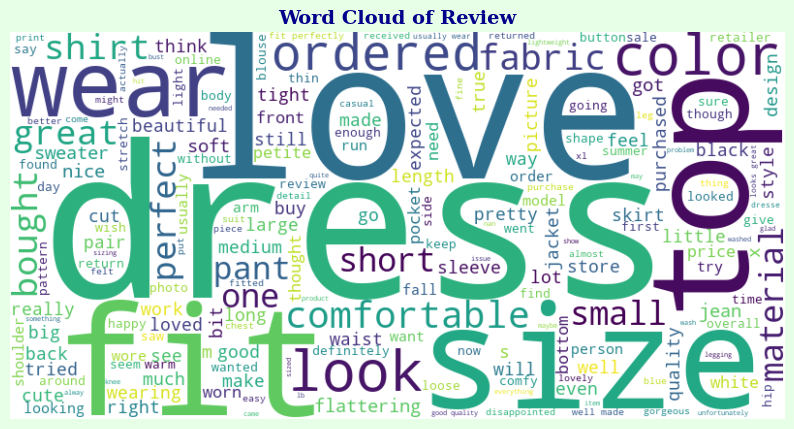

In [7]:
analysis.plotSentimentAnalysis(['Title','Review'])

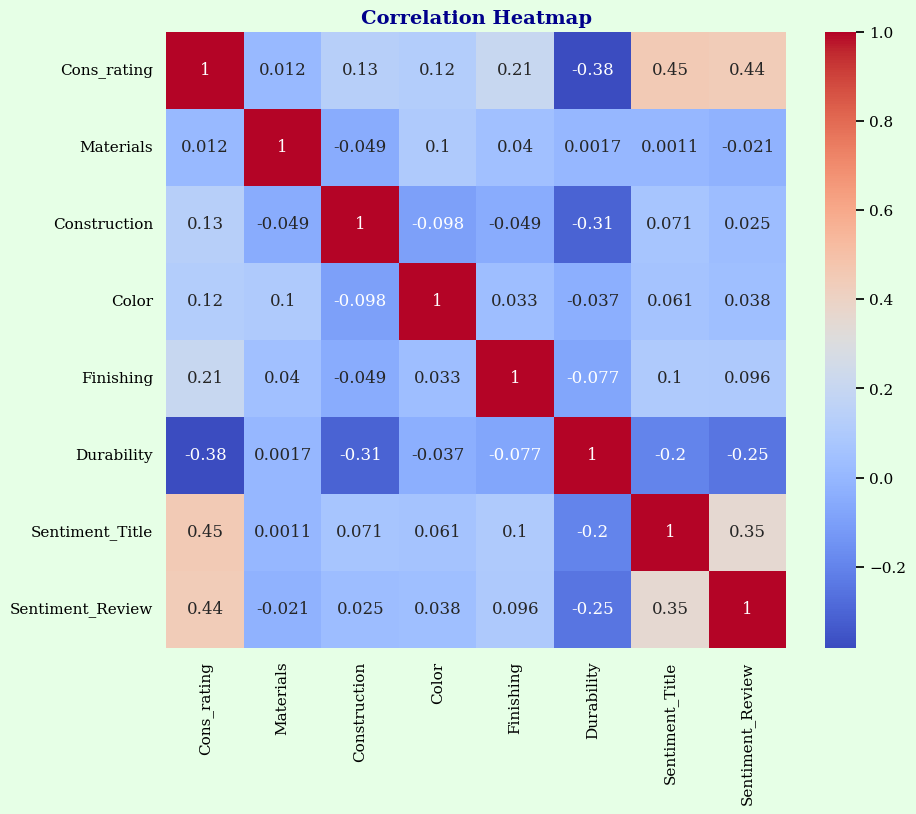

In [ ]:
analysis.plotCorrelationMatrix()